In [ ]:
!pip install tensorflow_addons
!pip install kaggle

     |████████████████████████████████| 1.1 MB 8.5 MB/s 


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
import PIL
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import os
import random
from tqdm import tqdm
import tensorflow_addons as tfa
import random
from sklearn.preprocessing import MultiLabelBinarizer
from PIL import Image

pd.set_option("display.max_columns", None)

print('success')

success


In [ ]:
import os
 
os.environ['KAGGLE_USERNAME'] = ''
os.environ['KAGGLE_KEY'] = ''
 
from kaggle.api.kaggle_api_extended import KaggleApi
 
api = KaggleApi()
api.authenticate()
 
competitions = api.competitions_list()
print(competitions)

[mpetitions/contradictory-my-dear-watson, mpetitions/gan-getting-started, mpetitions/store-sales-time-series-forecasting, mpetitions/tpu-getting-started, mpetitions/digit-recognizer, mpetitions/titanic, mpetitions/house-prices-advanced-regression-techniques, mpetitions/connectx, mpetitions/nlp-getting-started, mpetitions/spaceship-titanic, mpetitions/competitive-data-science-predict-future-sales, mpetitions/phase-ii-widsdatathon2022, mpetitions/us-patent-phrase-to-phrase-matching, mpetitions/herbarium-2022-fgvc9, mpetitions/iwildcam2022-fgvc9, mpetitions/sorghum-id-fgvc-9, mpetitions/hotel-id-to-combat-human-trafficking-2022-fgvc9, mpetitions/birdclef-2022, mpetitions/geolifeclef-2022-lifeclef-2022-fgvc9, mpetitions/h-and-m-personalized-fashion-recommendations]


In [ ]:
!kaggle competitions download -c plant-pathology-2021-fgvc8

100% 14.9G/14.9G [01:35<00:00, 200MB/s]
100% 14.9G/14.9G [01:35<00:00, 167MB/s]


In [ ]:
!unzip plant-pathology-2021-fgvc8.zip

Streaming output truncated to the last 5000 lines.
  inflating: train_images/e00c97b2de4749ce.jpg  
  inflating: train_images/e00df890cfe62736.jpg  
  inflating: train_images/e00ed0bf43a87f25.jpg  
  inflating: train_images/e00f759d65d52887.jpg  
  inflating: train_images/e00f934d9e50ad5b.jpg  
  inflating: train_images/e00fce341cb63da5.jpg  
  inflating: train_images/e010c7c35ecf3d1c.jpg  
  inflating: train_images/e01112939f783fec.jpg  
  inflating: train_images/e01592da4d71b8be.jpg  
  inflating: train_images/e0189acaf8cf80fd.jpg  
  inflating: train_images/e0189e4999bdd0fa.jpg  
  inflating: train_images/e01ae16d4a759cb5.jpg  
  inflating: train_images/e01dc39ccb2b4ccb.jpg  
  inflating: train_images/e01e42d90c66f3f3.jpg  
  inflating: train_images/e01e870bec65f40f.jpg  
  inflating: train_images/e01f17e0187fb80f.jpg  
  inflating: train_images/e01f503cb752e6c5.jpg  
  inflating: train_images/e024b69a784e9fc3.jpg  
  inflating: train_images/e026b4c23c9fcfc4.jpg  
  inflating: train

### Processing images
#### Example taken from: https://www.kaggle.com/seyunhan/inceptionresnetv2-keras-pbl4

We load the train,test,val images here

In [ ]:
train = pd.read_csv('./train.csv')

In [ ]:
# train['image'] = train['image']
train['labels'] = train['labels'].apply(lambda string: string.split(' '))
train

,image,labels
0,800113bb65efe69e.jpg,[healthy]
1,8002cb321f8bfcdf.jpg,"[scab, frog_eye_leaf_spot, complex]"
2,80070f7fb5e2ccaa.jpg,[scab]
3,80077517781fb94f.jpg,[scab]
4,800cbf0ff87721f8.jpg,[complex]
...,...,...
18627,fffb900a92289a33.jpg,[healthy]
18628,fffc488fa4c0e80c.jpg,[scab]
18629,fffc94e092a59086.jpg,[rust]
18630,fffe105cf6808292.jpg,"[scab, frog_eye_leaf_spot]"


Index(['complex', 'frog_eye_leaf_spot', 'healthy', 'powdery_mildew', 'rust',
       'scab'],
      dtype='object')
complex               2151
frog_eye_leaf_spot    4352
healthy               4624
powdery_mildew        1271
rust                  2077
scab                  5712
dtype: int64
['complex', 'frog_eye_leaf_spot', 'healthy', 'powdery_mildew', 'rust', 'scab']


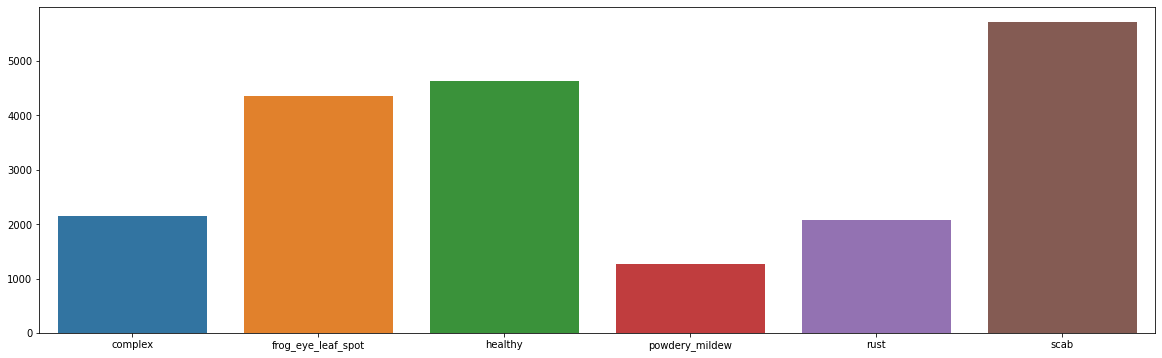

In [ ]:
s = list(train['labels'])
mlb = MultiLabelBinarizer()
trainx = pd.DataFrame(mlb.fit_transform(s), columns=mlb.classes_, index=train.index)
print(trainx.columns)
print(trainx.sum())

labels = list(trainx.sum().keys())
print(labels)
label_counts = trainx.sum().values.tolist()

fig, ax = plt.subplots(1,1, figsize=(20,6))

sns.barplot(x= labels, y= label_counts, ax=ax)

Move images

In [ ]:
images = []

for img_name in tqdm(train['image']):
    path = './train_images/'+str(img_name)
    with PIL.Image.open(path) as img:
        img = img.resize((300,300))
        img.save(f'./train_images/{img_name}')
    images.append(cv2.imread(path))

100%|██████████| 18632/18632 [58:39<00:00,  5.29it/s]


In [ ]:
#This model takes input images of shape (300, 300, 3), and the input data should range [0, 255]. 
# data_set = pd.read_csv('train_image.csv', header=None)
# data_frames = pd.DataFrame(data_set)

images = np.asarray(images)
images.shape

(18632, 300, 300, 3)

### Viewing some images

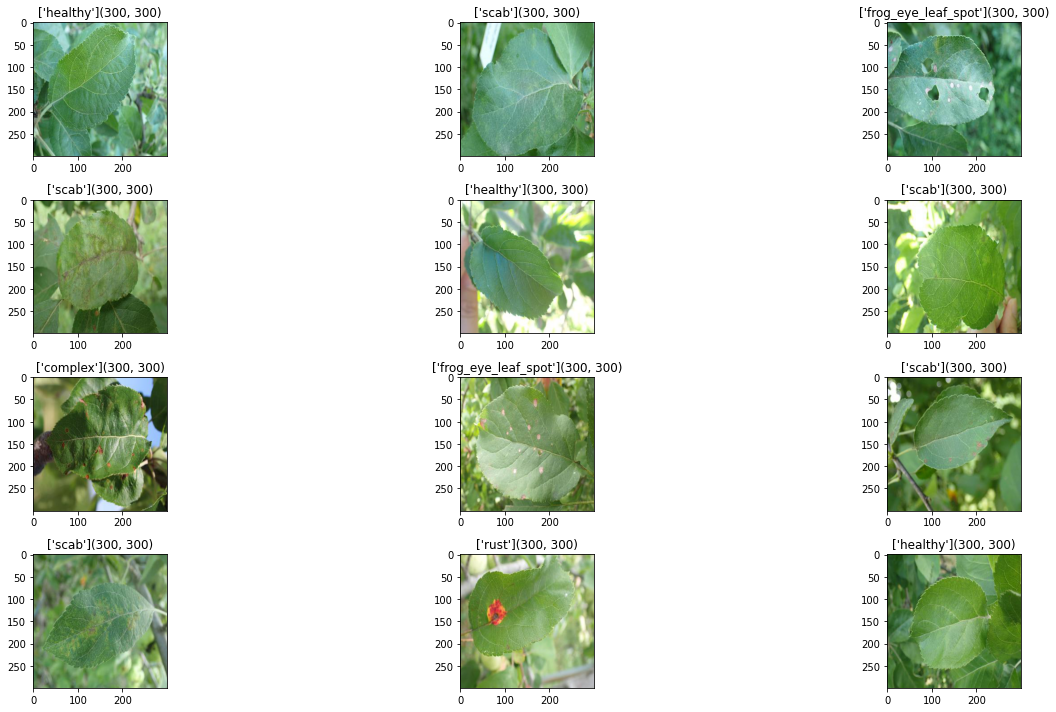

In [ ]:
fig1 = plt.figure(figsize=(26,10))

for i in range(1, 13):
    
    rand =  random.randrange(1, len(list(train['image'])))
    sample = os.path.join('./train_images/', train['image'][rand])
    
    img = Image.open(sample)
    
    ax = fig1.add_subplot(4,3,i)
    ax.imshow(img)
    
    title = f"{train['labels'][rand]}{img.size}"
    plt.title(title)
    
    fig1.tight_layout()

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer

class MultiHotEncoder(BaseEstimator, TransformerMixin):
    """Wraps `MultiLabelBinarizer` in a form that can work with `ColumnTransformer`. Note
    that input X has to be a `pandas.DataFrame`.
    """
    def __init__(self):
        self.mlbs = list()
        self.n_columns = 0
        self.categories_ = self.classes_ = list()

    def fit(self, X:pd.DataFrame, y=None):
        for i in range(X.shape[1]): # X can be of multiple columns
            mlb = MultiLabelBinarizer()
            mlb.fit(X.iloc[:,i])
            self.mlbs.append(mlb)
            self.classes_.append(mlb.classes_)
            self.n_columns += 1
        return self

    def transform(self, X:pd.DataFrame):
        if self.n_columns == 0:
            raise ValueError('Please fit the transformer first.')
        if self.n_columns != X.shape[1]:
            raise ValueError(f'The fit transformer deals with {self.n_columns} columns '
                             f'while the input has {X.shape[1]}.'
                            )
        result = list()
        for i in range(self.n_columns):
            result.append(self.mlbs[i].transform(X.iloc[:,i]))

        result = np.concatenate(result, axis=1)
        return result

col_transformer = ColumnTransformer([
    ('multi-hot', MultiHotEncoder(), ['labels'])
])
Y = col_transformer.fit_transform(train)
print(col_transformer.named_transformers_['multi-hot'].categories_)
Y

[array(['complex', 'frog_eye_leaf_spot', 'healthy', 'powdery_mildew',
       'rust', 'scab'], dtype=object)]


array([[0, 0, 1, 0, 0, 0],
       [1, 1, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1],
       ...,
       [0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0]])

In [ ]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

print(Y)

images, Y = shuffle(images, Y, random_state=1)


train_x, test_x, train_y, test_y = train_test_split(images, Y, test_size=0.2, random_state=415)
images = None
Y = None

#inpect the shape of the training and testing.
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

[[0 0 1 0 0 0]
 [1 1 0 0 0 1]
 [0 0 0 0 0 1]
 ...
 [0 0 0 0 1 0]
 [0 1 0 0 0 1]
 [0 0 1 0 0 0]]
(14905, 300, 300, 3)
(14905, 6)
(3727, 300, 300, 3)
(3727, 6)


# Image Classification Using EfficientNetB3

In [14]:
from tensorflow.keras import layers
from keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications import EfficientNetB3

NUM_CLASSES = 6
IMG_SIZE = 300
size = (IMG_SIZE, IMG_SIZE)

early_stopping = EarlyStopping(monitor='val_loss', patience=5)
bst_model_path = 'efficientnetb3.h5'
model_checkpoint = ModelCheckpoint(bst_model_path, save_best_only=True, save_weights_only=True)


inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
outputs = EfficientNetB3(include_top=True, weights=None, classes=NUM_CLASSES)(inputs)
model = tf.keras.Model(inputs, outputs)
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"] )
model.summary()

with tf.device('/GPU:0'):
  hist = model.fit(train_x, train_y, \
                   validation_data=(test_x, test_y), \
                   epochs=50, batch_size=4, verbose=2, shuffle=True, \
                   callbacks=[early_stopping, model_checkpoint])
  model.load_weights(bst_model_path)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 300, 300, 3)]     0         
                                                                 
 efficientnetb3 (Functional)  (None, 6)                10792757  
                                                                 
Total params: 10,792,757
Trainable params: 10,705,454
Non-trainable params: 87,303
_________________________________________________________________
Epoch 1/50
3727/3727 - 513s - loss: 0.4785 - accuracy: 0.2729 - val_loss: 0.6996 - val_accuracy: 0.2173 - 513s/epoch - 138ms/step
Epoch 2/50
3727/3727 - 485s - loss: 0.4492 - accuracy: 0.2695 - val_loss: 0.4483 - val_accuracy: 0.2737 - 485s/epoch - 130ms/step
Epoch 3/50
3727/3727 - 485s - loss: 0.4404 - accuracy: 0.2747 - val_loss: 0.4233 - val_accuracy: 0.2957 - 485s/epoch - 130ms/step
Epoch 4/50
3727/3727 - 485s - loss: 0.4171 - accur

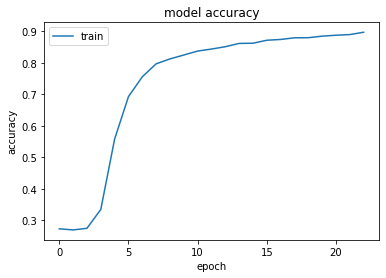

In [15]:
import matplotlib.pyplot as plt


def plot_hist(hist):
    plt.plot(hist.history["accuracy"])
    #plt.plot(hist.history["val_accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()
    
plot_hist(hist)

In [16]:
preds = model.evaluate(test_x, test_y)
print ("Loss = " + str(preds[0]))
print ("Validation Accuracy = " + str(preds[1]))

117/117 [==============================] - 15s 123ms/step - loss: 0.1274 - accuracy: 0.8632
Loss = 0.1273946464061737
Validation Accuracy = 0.8631607294082642


In [17]:
from google.colab import files
files.download('/content/efficientnetb3.h5') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Testing Efficient Model On Unseen data

test_images/85f8cb619c66b863.jpg
Input image shape: (1, 300, 300, 3)
[[0.15061116 0.10059601 0.04683049 0.02708893 0.06767648 0.6071969 ]]
test_images/c7b03e718489f3ca.jpg
Input image shape: (1, 300, 300, 3)
[[0.00155552 0.00196773 0.9753479  0.00626354 0.00191664 0.01294874]]
test_images/ad8770db05586b59.jpg
Input image shape: (1, 300, 300, 3)
[[2.0791279e-02 8.6367458e-02 8.9655910e-04 6.0278649e-04 2.0367363e-02
  8.7097448e-01]]


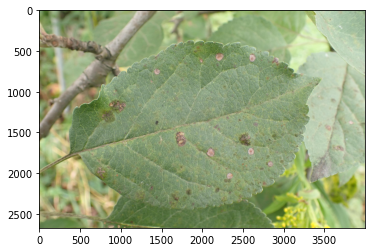

In [18]:
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from tensorflow.keras.applications.imagenet_utils import preprocess_input

path = 'test_images/'
dataset_path = os.listdir('test_images')

preds = []

#img = image.load_img(img_path, target_size=(224, 224))
#x = img.img_to_array(img)

for i in dataset_path:
    img_path = path + str(i)
    print(img_path)
    img = cv2.imread(img_path)
    img = cv2.resize(img, (300, 300))

    x = np.expand_dims(img, axis=0)
    x = preprocess_input(x)

    print('Input image shape:', x.shape)

    my_image = imread(img_path)
    imshow(my_image)
    
    pred=model.predict(x)
    print(pred)     # probabilities for being in each of the 3 classes
    preds.append(pred.tolist()[0])

In [19]:
n_labels = 5
test = pd.read_csv('./sample_submission.csv')

# {0: 'complex', 1: 'frog_eye_leaf_spot', 2: 'healthy', 3: 'powdery_mildew', 4: 'rust', 5: 'scab'}
threshold = {0: 0.26, # Complex
             5: 0.61, # scab
             1: 0.7, # frog eye leaf spot
             4: 0.5, # rust
             3: 0.5, # powdery mildew
             2: 0.3} #healthy

# Can set different threshold here
indices = []
for pred in preds:
    temp = []
    for category in pred:
        if category>=threshold[pred.index(category)]: #assigning a different threshold to each disease
            temp.append(pred.index(category))
    if temp!=[]:
        pass
    else:
        temp.append(np.argmax(pred))
    # only add the predicted healthy labels, remove others
    if 2 in temp:
        temp = [2] # Resets the list 
    indices.append(temp)
    
print(indices)

[[5], [2], [5]]


In [20]:
actualtestlabels = []


for image in indices:
    temp = []
    for i in image:
        temp.append(str(labels[i]))
    actualtestlabels.append(' '.join(temp))

print(actualtestlabels)

sub = pd.read_csv('./sample_submission.csv')
sub['labels'] = actualtestlabels
sub.to_csv('submission.csv', index=False)
sub

['scab', 'healthy', 'scab']


,image,labels
0,85f8cb619c66b863.jpg,scab
1,ad8770db05586b59.jpg,healthy
2,c7b03e718489f3ca.jpg,scab


In [21]:
files.download('/content/submission.csv') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>